<a href="https://colab.research.google.com/github/jamesgunadi24/Case-Study-01-Data-Mining---EDA---Ganjil-2022-Kelompok-L/blob/main/Datamining_Case_Study_Group_L.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import drive
from oauth2client.client import GoogleCredentials
import matplotlib.pyplot as plt

In [ ]:
# Loading Data:
import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

In [ ]:
N = 13
# Select first N columns
dfJ_  = dfJ.iloc[: , :N]
dfD_ = dfD.iloc[: , :N]
dfB_ = dfB.iloc[: , :N]
dfT_ = dfT.iloc[: , :N]
dfX_ = dfX.iloc[: , :N]

In [ ]:
try:
  dfJ_.insert(13, 'Location', 'Jakarta')
except:
  pass

In [ ]:
try:
  dfD_.insert(13, 'Location', 'Depok')
except:
  pass

In [ ]:
try:
  dfB_.insert(13, 'Location', 'Bogor')
except:
  pass

In [ ]:
try:
  dfT_.insert(13, 'Location', 'Tangerang')
except:
  pass

In [ ]:
dfX_.insert(13, 'Location', 'Bekasi')
dfX_

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,Location
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,NaN,5.500000e+08,Rumah murah di metland cibitung bekasi - Dijua...,Bekasi
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,4.400000e+08,Rumah dijual di Griya gandasari cibitung - Dij...,Bekasi
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,NaN,6.990000e+08,Jual cepat rumah huuk di metland cibitung beka...,Bekasi
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Selatan,1.350000e+09,https://www.realoka.com/216243-rumah-rapi-siap...,Bekasi
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,Timur,1.400000e+09,https://www.realoka.com/207964-jual-rumah-bagu...,Bekasi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bekasi


In [ ]:
frames = [dfJ_, dfD_, dfB_, dfT_, dfX_]
merged=pd.concat([dfJ_, dfD_, dfB_, dfT_, dfX_])

In [ ]:
datafixgol=merged.dropna(thresh=10) #Akan dikeluarkan missing values dengan menggunakan thresh

In [ ]:
datafixgol.fillna(0,inplace=True)
datafixgol.reset_index(drop=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5182: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,Location
0,06-12-2021,202.0,198.0,8.0,3.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
1,02-12-2021,30.0,55.0,2.0,1.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
2,06-12-2021,19.0,35.0,2.0,1.0,0.0,0.0,Jakarta Pusat,SHM,2200.0,0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,Jakarta
3,06-12-2021,33.0,42.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,Jakarta
4,06-12-2021,30.0,55.0,2.0,2.0,0.0,1.0,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,01-12-2021,180.0,220.0,5.0,3.0,0.0,0.0,Kota Bekasi,SHM,2200.0,0,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
658,01-12-2021,140.0,250.0,3.0,2.0,0.0,0.0,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
659,01-12-2021,60.0,55.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
660,01-12-2021,36.0,60.0,2.0,1.0,0.0,0.0,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi


###Melalui tabel diatas dapat diketahui bahwa terdapat 662 data rumah yang berada di Jakarta, Bekasi, Depok, Bogor, Tangerang



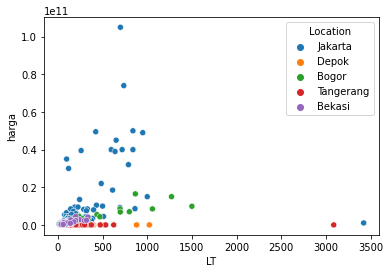

In [ ]:
#Checking Distribution
sns.scatterplot(data=datafixgol, y="harga",x="LT",hue="Location")
datafixgol = datafixgol.astype({"LT": int, "LB": int, "KT": int,"KM": int,"garasi": int,"carport": int}) #change dtype of columns into int

###Bersasarkan hasil analisis Scatterplot, terindikasi terdapat outlier pada data sehingga akan dilakukan deteksi outlier.

In [ ]:
q1 = datafixgol['harga'].quantile(0.25)    #untuk mendapatkan kuartil bawah dari data
q3 = datafixgol['harga'].quantile(0.75)    #untuk mendapatkan kuartil atas dari data
IQR = q3 - q1                                #meng-eliminasi kuartil atas dengan kuartil bawah sehingga di dapat interquartile range (IQR)


outlier_atas = datafixgol['harga']>q3+(1.5)*IQR    #untuk mendapatkan outlier atas, pada boxplot dapat kita lihat bahwa outlier berada pada angka yang lebih besar dari q3 + (1.5)*IQR
data_outlier_atas = datafixgol.loc[outlier_atas]         #untuk mengeluarkan outlier atas dari data dan di simpan dalam variabel data_outlier_atas
data_outlier_atas  
Lower_bound = q1 - 1.5*IQR
Upper_bound = q3 + 1.5*IQR
print("Lower_bound = {}, Upper_bound = {}".format(Lower_bound, Upper_bound))
outliers_ =  datafixgol[(datafixgol.harga<Lower_bound)|(datafixgol.harga>Upper_bound)]
outliers_ 

Lower_bound = -2024995125.0, Upper_bound = 3374997075.0


,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,Location
0,06-12-2021,202,198,8,3,0,0,Jakarta Pusat,SHM,2200.0,0,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
5,06-12-2021,217,245,6,4,0,2,Jakarta Pusat,SHM,4400.0,0,5.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
6,06-12-2021,424,1000,4,5,1,1,Jakarta Pusat,SHM,33000.0,Timur,4.950000e+10,https://www.rumah.com/listing-properti/dijual-...,Jakarta
7,06-12-2021,597,700,5,4,2,5,Jakarta Pusat,SHM,8000.0,0,4.000000e+10,https://www.rumah.com/listing-properti/dijual-...,Jakarta
11,05-12-2021,75,260,10,10,0,3,Jakarta Pusat,SHM,3500.0,0,5.300000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,04-12-2021,470,260,4,2,0,4,Bogor Selatan,SHM,2200.0,0,4.350000e+09,https://www.rumah.com/listing-properti/dijual-...,Bogor
168,05-12-2021,345,287,5,4,0,2,Babakan Madang,SHM,6600.0,0,3.800000e+09,https://www.rumah.com/listing-properti/dijual-...,Bogor
174,03-12-2021,1058,283,6,6,3,5,Bogor Tengah,SHM,1300.0,0,8.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Bogor
7,07-12-2021,336,200,4,3,0,1,Kabupaten Bekasi,HGB,5500.0,0,4.200000e+09,https://www.99.co/id/properti/rumah-cluster-pa...,Bekasi


###Berdasarkan perhitungan dari btas bawah dan batas atas, dapat ditemukan 77 data yang berada di luar ambang batas tersebut. Maka kami akan mengeluarkan outlier tersebut.

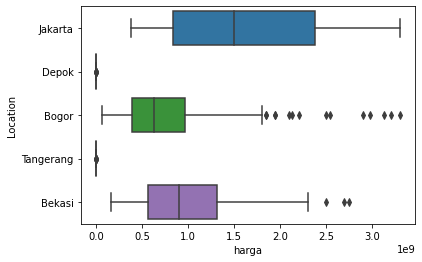

In [ ]:
# BoxPlots

df_tanpa_outliers = datafixgol[(datafixgol.harga>Lower_bound)&(datafixgol.harga<Upper_bound)]
df_tanpa_outliers

p = sns.boxplot(x="harga", y="Location", data=df_tanpa_outliers)


###Berdasarkan hasil analisis boxplot, ditemukan bahwa Depok dan Tangerang memiliki harga yang cenderung lebih rendah dibandingkan Bekasi, Jakarta, dan Bogor. Maka akan dilakukan visualisasi dengan men-split 2 kategori harga tersebut

In [ ]:
df_tanpa_outliers

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,Location
1,02-12-2021,30,55,2,1,0,1,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
2,06-12-2021,19,35,2,1,0,0,Jakarta Pusat,SHM,2200.0,0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,Jakarta
3,06-12-2021,33,42,2,2,0,1,Jakarta Pusat,SHM,2200.0,0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,Jakarta
4,06-12-2021,30,55,2,2,0,1,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
8,06-12-2021,60,98,3,3,0,1,Jakarta Pusat,SHM,2200.0,0,1.700000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180,220,5,3,0,0,Kota Bekasi,SHM,2200.0,0,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
103,01-12-2021,140,250,3,2,0,0,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
104,01-12-2021,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
105,01-12-2021,36,60,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi


###Visualisasi Scatterplot harga yang cenderung lebih tinggi untuk Kota Jakarta, Bogor, Bekasi

In [ ]:
Jabobe = df_tanpa_outliers[(df_tanpa_outliers["Location"] == 'Jakarta') | (df_tanpa_outliers["Location"] == "Bogor") | (df_tanpa_outliers["Location"] == "Bekasi")]
Jabobe

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,Location
1,02-12-2021,30,55,2,1,0,1,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
2,06-12-2021,19,35,2,1,0,0,Jakarta Pusat,SHM,2200.0,0,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,Jakarta
3,06-12-2021,33,42,2,2,0,1,Jakarta Pusat,SHM,2200.0,0,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,Jakarta
4,06-12-2021,30,55,2,2,0,1,Jakarta Pusat,SHM,2200.0,0,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
8,06-12-2021,60,98,3,3,0,1,Jakarta Pusat,SHM,2200.0,0,1.700000e+09,https://www.rumah.com/listing-properti/dijual-...,Jakarta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180,220,5,3,0,0,Kota Bekasi,SHM,2200.0,0,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
103,01-12-2021,140,250,3,2,0,0,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
104,01-12-2021,60,55,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,0,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi
105,01-12-2021,36,60,2,1,0,0,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,Bekasi


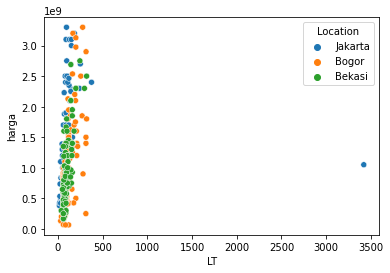

In [ ]:
#Checking Distribution
sns.scatterplot(data=Jabobe, y="harga",x="LT",hue="Location")

###Namun, ditemukan 1 outlier pada Wilayah Jakarta, dengan luas tanah yang sangat besar dengan harga yang tidak tinggi. Maka dari itu, akan dikeluarkan dari hasil visualisasi. 

###Maka dari itu kami akan mengonfirmasi apakah terjadi kesalahan input atau itu memang data sebenarnya.

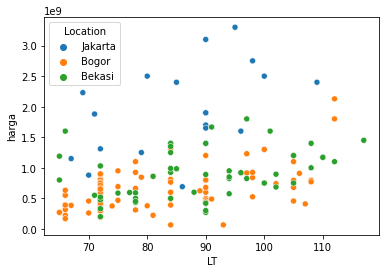

In [ ]:
q_low = Jabobe["LT"].quantile(0.25)
q_hi  = Jabobe["LT"].quantile(0.75)

Jabobe_LT = Jabobe[(Jabobe["LT"] < q_hi) & (Jabobe["LT"] > q_low)]
sns.scatterplot(data=Jabobe_LT, y="harga",x="LT",hue="Location")

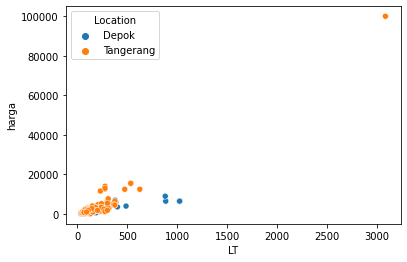

In [ ]:
Deta = datafixgol[(datafixgol["Location"] == 'Depok') | (datafixgol["Location"] == "Tangerang")]
Deta.reset_index(inplace=True)
sns.scatterplot(data=Deta, y="harga",x="LT",hue="Location")

###Pada hasil visualisasi di atas, ditemukan 1 Rumah di Wilayah Tangerang yang memiliki luas tanah yang sangat besar (3000) dengan harga yang sangat tinggi sehingga untuk tujuan visualisasi akan dikeluarkan data rumah tersebut

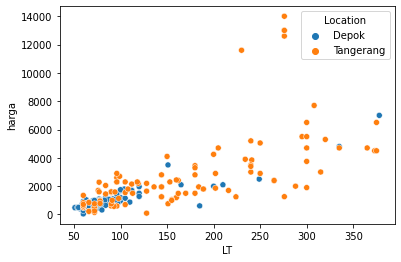

In [ ]:
qi_low = Deta["LT"].quantile(0.05)
qi_hi  = Deta["LT"].quantile(0.95)

Deta_LT = Deta[(Deta["LT"] < qi_hi) & (Deta["LT"] > qi_low)]
sns.scatterplot(data=Deta_LT, y="harga",x="LT",hue="Location")

#Luas Bangunan#

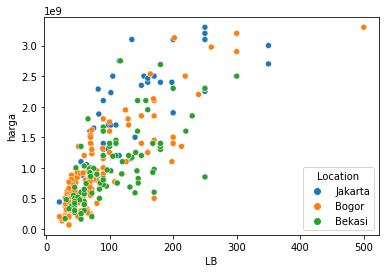

In [ ]:
sns.scatterplot(data=Jabobe, y="harga",x="LB",hue="Location")

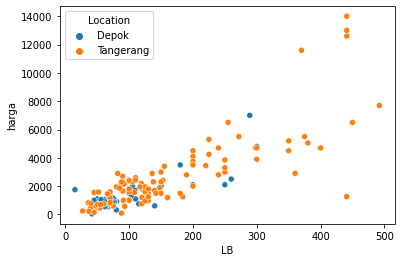

In [ ]:
sns.scatterplot(data=Deta_LT, y="harga",x="LB",hue="Location")

#Kamar Tidur#

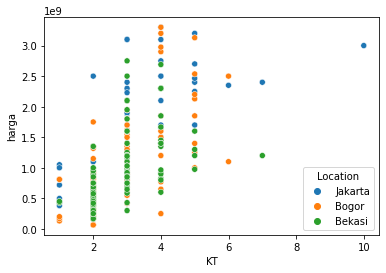

In [ ]:
sns.scatterplot(data=Jabobe, y="harga",x="KT",hue="Location")

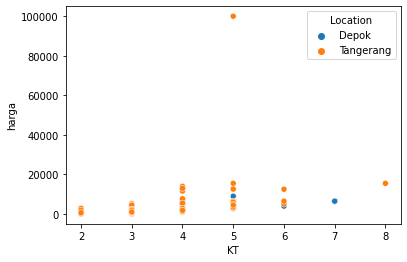

In [ ]:
sns.scatterplot(data=Deta, y="harga",x="KT",hue="Location")

#Kamar Mandi#

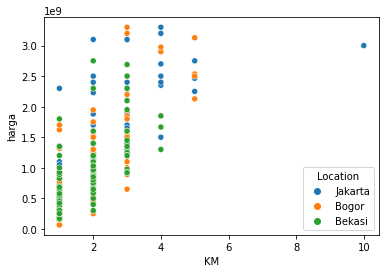

In [ ]:
sns.scatterplot(data=Jabobe, y="harga",x="KM",hue="Location")

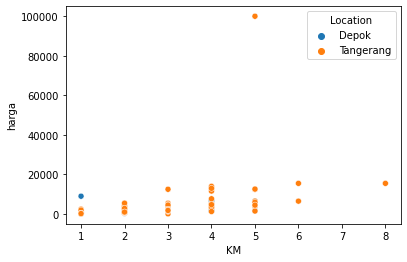

In [ ]:
sns.scatterplot(data=Deta, y="harga",x="KM",hue="Location")

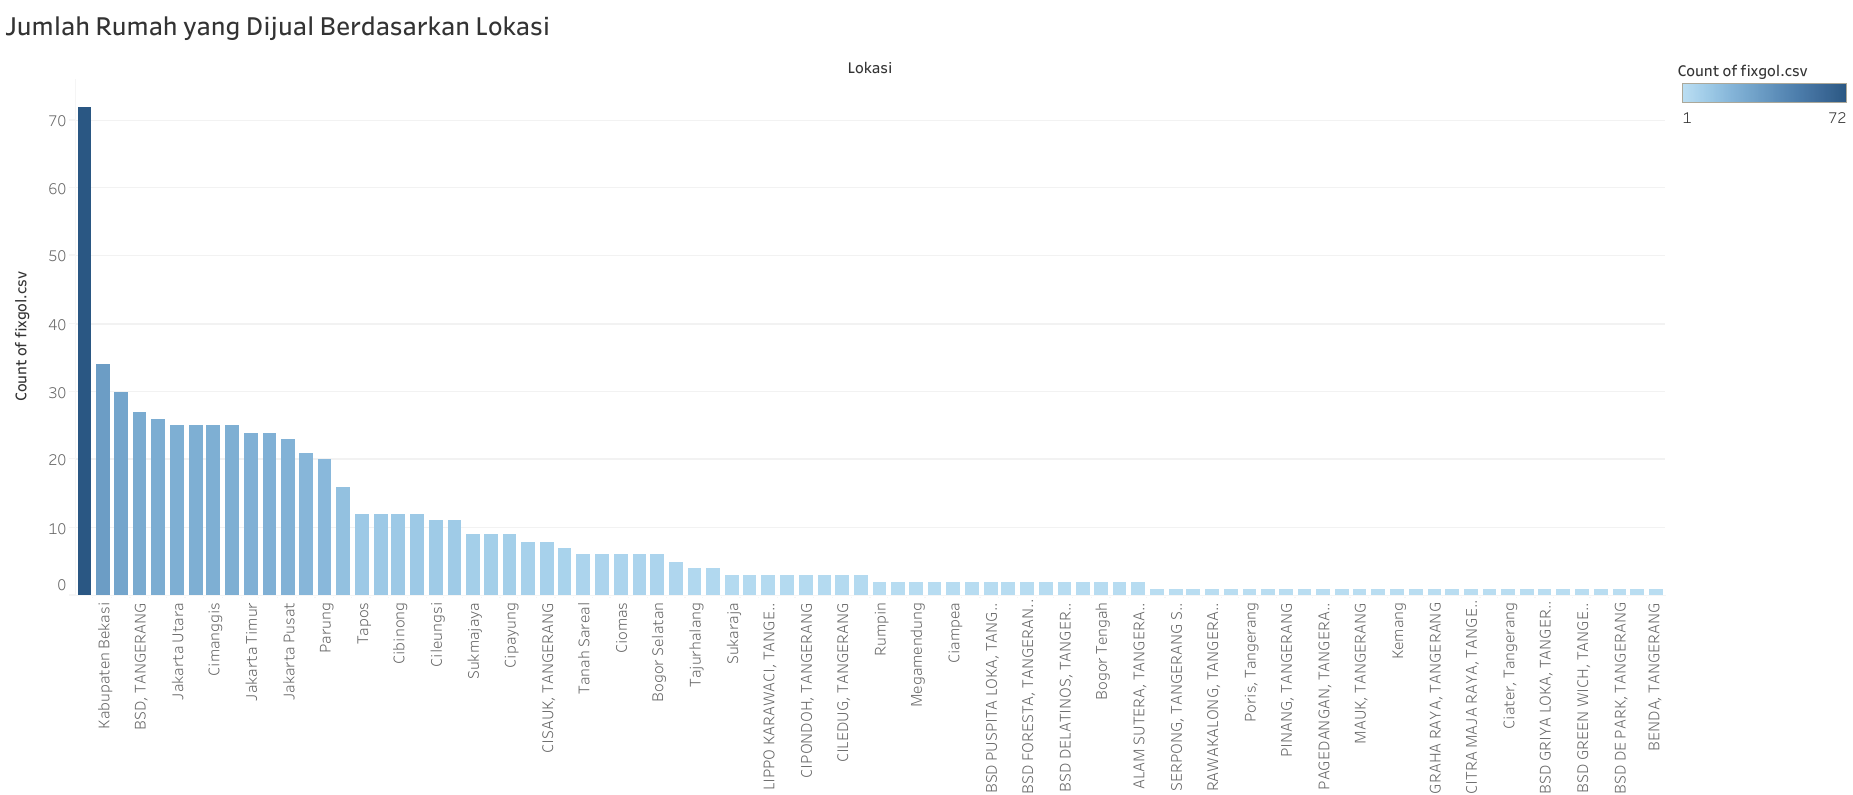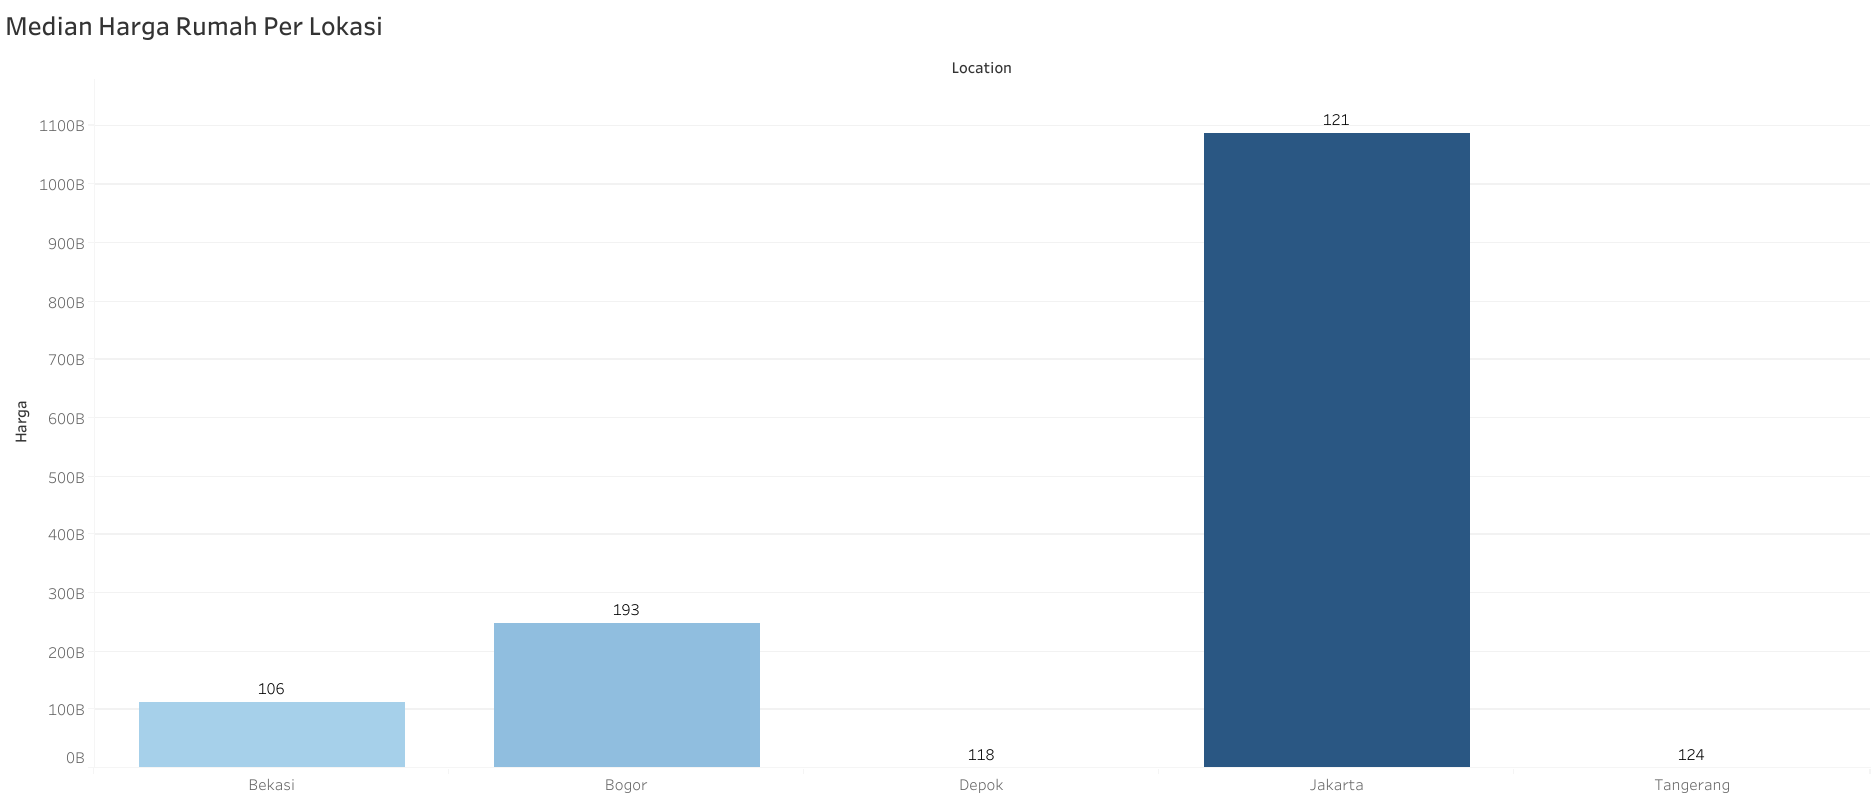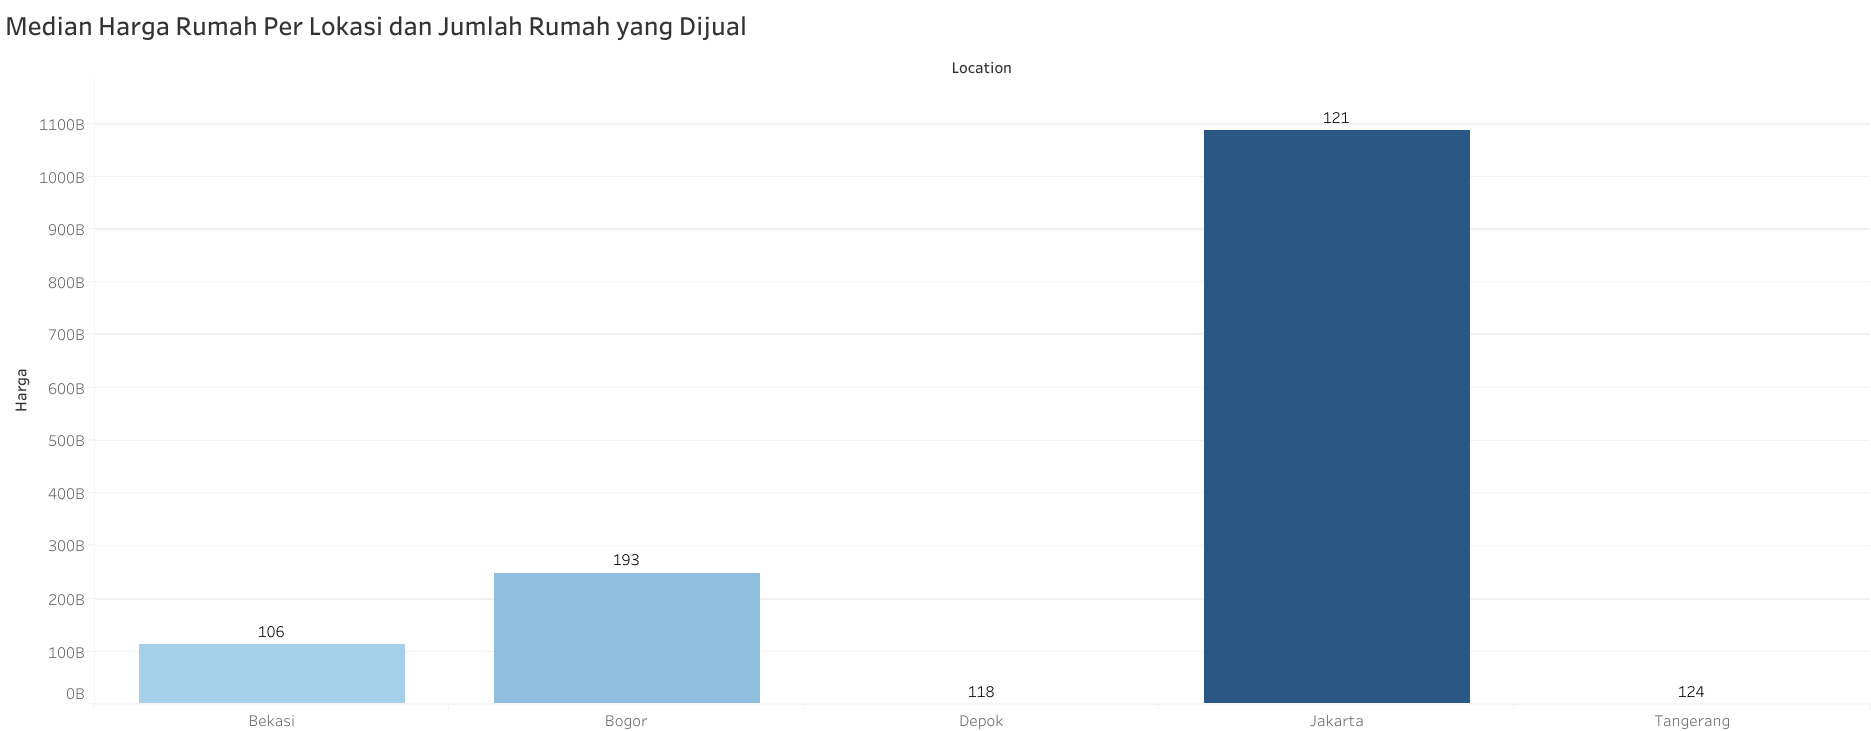

##Executive Summary##

#####Pada kesempatan ini akan dilakukan ringkasan dari haisl analisis dan penemuan kami pada perusahaan RPPI


- Data yang dimiliki perusahaan berkualitas
- Berdasarkan hasil analisis Boxplot, terdapat kecenderungan pada Rumah yang terdapat di Wilayah Jakarta, Bogor, Bekasi memiliki harga yang lebih tinggi, sedangkan Tangerang dan Depok memiliki nilai harga yang lebih rendah sehingga untuk penjualan harga yang lebih tinggi dapat dilakukan di daerah Jabobe
- Perusahaan RPPI dapat membuka kota cabang di Jakarta karena memiliki jumlah konsumen tertinggi
- Investasi 25 miliar dapat dilakukan di Wilayah Jakarta. Namun, kami tidak menyarankan perusahaan untuk menginvestasikannya secara langsung, tetapi secara berangsur dengan mengevaluasi harga tersebut setiap periodenya